In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Problem 1

In [ ]:
#calculate the weight terms
def cum_weight(n,lambda_):
    w = np.zeros(n)
    cum_w = np.zeros(n)
    for i in range(0,n):
        w[n-i-1] = (1 - lambda_)* (np.power(lambda_, i+1))
    
    tw = w.sum()
    for i in range(0, n):
        w[n-i-1] = w[n-i-1]/tw
        
    return w

# calculate cumulative variance for each (x,y) pair
def cum_var(x,y, lambda_):
    n = len(x)
    w = cum_weight(n, lambda_=lambda_)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    cum_var = np.zeros((n,n))
    cov = w.T@((x-x_bar)*(y-y_bar))
    #for i in range(0, n):
     #   cov = cov + w[i]*(x[i]-x_bar)*(y[i]-y_bar)
    
    return cov

# calculate the covariance matrix
def ew_cov(df,lambda_):
    n = df.shape[1]
    df = np.transpose(df)
    cov_m = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            cov = cum_var(df[i], df[j], lambda_=lambda_)
            cov_m[i,j] = cov


    return cov_m
# calculate the (cumulative) explaination for each eigenvalue
def PCA_explain(mat):
    eigen_lam, eigen_vec = np.linalg.eigh(mat)
    eigen_lam.sort()
    eigen_lam = eigen_lam[np.where(eigen_lam>0)]
    k = len(eigen_lam)
    explain = np.zeros(k)
    for i in range(1,k+1):
        explain[i-1] = eigen_lam[-i]/eigen_lam.sum()

    explain_cum = explain.cumsum()
    return explain_cum


    



In [279]:
data = pd.read_csv("DailyReturn.csv") # retreive data
cov_mat = ew_cov(data.values[:,1:], lambda_=0.97) # example, \lambda = 0.97

In [281]:
cov_mat

array([[8.41106909e-05, 1.06945662e-04, 1.21760871e-04, ...,
        1.25484463e-04, 8.11331555e-05, 8.61130395e-05],
       [1.06945662e-04, 2.68752303e-04, 1.97531665e-04, ...,
        1.15658764e-04, 3.74977522e-05, 8.22220854e-05],
       [1.21760871e-04, 1.97531665e-04, 2.91157502e-04, ...,
        8.30278956e-05, 3.31844912e-05, 7.34713753e-05],
       ...,
       [1.25484463e-04, 1.15658764e-04, 8.30278956e-05, ...,
        7.47889224e-04, 2.68371109e-04, 2.00639601e-04],
       [8.11331555e-05, 3.74977522e-05, 3.31844912e-05, ...,
        2.68371109e-04, 3.08241679e-04, 8.21009546e-05],
       [8.61130395e-05, 8.22220854e-05, 7.34713753e-05, ...,
        2.00639601e-04, 8.21009546e-05, 2.62692778e-04]])

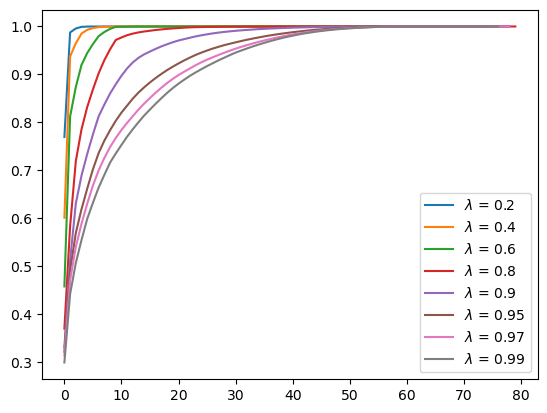

In [516]:
# Draw the PCA explanation graph
lambdas = [0.2,0.4,0.6,0.8,0.9,0.95,0.97,0.99]
for l in lambdas:
    cov_mat = ew_cov(data.values[:,1:], lambda_=l)
    explain_cum = PCA_explain(cov_mat)
    plt.plot(explain_cum, label = "$\lambda$ = "+str(l))
plt.legend()

plt.savefig('prob_1.png')

In [570]:
vals, vecs  = np.linalg.eigh(ew_cov(data.values[:,1:], lambda_=0.8))
vals

array([-5.84699739e-19, -3.04873450e-19, -2.38685034e-19, -2.17978861e-19,
       -1.69878026e-19, -1.60010898e-19, -1.36446926e-19, -1.21431630e-19,
       -1.16853417e-19, -9.13347587e-20, -8.98095166e-20, -8.20679879e-20,
       -7.67849055e-20, -6.98357925e-20, -4.50334282e-20, -4.37804615e-20,
       -3.07420553e-20, -2.80596161e-20, -2.45092877e-20, -2.42474219e-20,
       -3.99764474e-21,  6.94073944e-22,  7.01935772e-21,  7.92829942e-21,
        1.14805041e-20,  1.78381559e-20,  2.52391211e-20,  3.37063333e-20,
        3.47182493e-20,  3.65101471e-20,  4.43789244e-20,  6.15733724e-20,
        7.50189425e-20,  8.32911442e-20,  8.70175668e-20,  1.05010228e-19,
        1.25458956e-19,  1.28601007e-19,  1.71030551e-19,  2.40111036e-19,
        3.13951045e-19,  3.35850198e-19,  1.94329542e-09,  3.32329427e-09,
        5.14397618e-09,  7.81746258e-09,  1.02403242e-08,  1.13315262e-08,
        1.48011819e-08,  1.53391778e-08,  1.95852063e-08,  2.60562515e-08,
        3.59577334e-08,  

# Problem 2

In [32]:

def chol_psd(mat):
    #cholesky for psd
    L = np.zeros(mat.shape)
    n = len(mat)
    for i in range(0,n):
        s = 0
        if i > 0:
            s = np.dot(L[i,:i].T, L[i,:i])

        temp = mat[i,i] -s
        if 0 >= temp >= -1e-8:
            temp = 0
        L[i,i] = np.sqrt(temp)

        if L[i,i] == 0 :
            L[i,(i+1):] = 0
        else:
            ir = 1/L[i, i]
            for j in range((i +1),n):

                s = np.dot(L[j, :i].T, L[i,:i])
                if i == 0:
                    s = 0

                L[j,i] = (mat[j,i] - s) * ir
    return L

In [514]:
sigma = np.ones((5,5)) * 0.9
for i in range(0,5):
    sigma[i,i] = 1

In [515]:
L = chol_psd(sigma)
L

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.9       , 0.43588989, 0.        , 0.        , 0.        ],
       [0.9       , 0.20647416, 0.38388595, 0.        , 0.        ],
       [0.9       , 0.20647416, 0.12339191, 0.36351459, 0.        ],
       [0.9       , 0.20647416, 0.12339191, 0.08842247, 0.35259655]])

In [244]:
def near_psd(a, epsilon = 0):
    #nearest psd
    n = len(a)
    result = a
    # check corr:

    is_cov = np.any(np.diagonal(a) != 1)


    if is_cov:
        inv_std = np.diag(1/ np.sqrt(np.diagonal(a)))
        result = np.dot(np.dot(inv_std, a ), inv_std)
    vals, vecs = np.linalg.eigh(result)
    vals[np.where(vals < epsilon)] = epsilon
    T = 1/np.dot(np.square(vecs), vals)
    T = np.diag(np.sqrt(T))
    l = np.diag(np.sqrt(vals))
    B = np.dot(np.dot(T, vecs), l)
    result = np.dot(B, B.T)
    if is_cov:
        std = np.sqrt(np.diagonal(a))
        result = (std.reshape(n,1) )* result * (std.reshape(1,n))

    return result




In [249]:
nearpsd = near_psd(sigma)

In [251]:
def fro_norm(a):
    return np.sum(np.square(a))

def P_s(a, wh):
    #helper function for higham, the second projection
    a = wh.dot(a).dot(wh)
    vals, vecs = np.linalg.eigh(a)
    vals[np.where(vals<0)] = 0
    a = vecs.dot(np.diag(vals)).dot(vecs.T)

    wh_inv =np.diag( 1/np.diagonal(wh))

    a = wh_inv.dot(a).dot(wh_inv)
    return a

def P_u(a):
    # helper function for higham, the first projection
    np.fill_diagonal(a, 1)
    return a

def higham_psd(a, tol= None, max_iter = 100, weights = None):
    #higham nearest psd
    if tol is None:
       tol = np.spacing(1) * len(a)
    if weights is None:
        weights = np.ones(len(a))
    w_h = np.diag(np.sqrt(weights))
    Y = np.copy(a)
    ds = np.zeros(np.shape(a))
    for i in range(0,max_iter):
        norm_Y_pre = fro_norm(Y)
        R = Y - ds
        X = P_s(R, w_h)

        ds = X-R
        Y = P_u(X)
        norm_Y = fro_norm(Y)

        if -1 * tol< norm_Y-norm_Y_pre < tol:
            break
    return Y



In [269]:

def gen_sigma(n):
    #generate sigma with different dimension
    sigma = np.ones((n,n)) * 0.9
    np.fill_diagonal(sigma, 1)
    sigma[0,1]=0.7357
    sigma[1,0]=0.7357
    return sigma

sigma = gen_sigma(5)
higham_psd(sigma, tol=0.1)


array([[1.        , 0.73570272, 0.89999825, 0.89999825, 0.89999825],
       [0.73570272, 1.        , 0.89999825, 0.89999825, 0.89999825],
       [0.89999825, 0.89999825, 1.        , 0.90000112, 0.90000112],
       [0.89999825, 0.89999825, 0.90000112, 1.        , 0.90000112],
       [0.89999825, 0.89999825, 0.90000112, 0.90000112, 1.        ]])

In [523]:
import time
#calculate the results
for n in [5, 50, 100, 500, 1000]:
    sigma = gen_sigma(n)
    np_start = time.time()
    nearpsd = near_psd(sigma)
    np_end = time.time()
    npsd_norm = fro_norm(nearpsd - sigma)

    print("n= {} & Nearest PSD & {:.4f}s & :{:.4g} \\\\".format(n, np_end- np_start, npsd_norm))

    hig_start = time.time()
    higham = higham_psd(sigma)
    higham_norm = fro_norm(higham - sigma)
    hig_end = time.time()
    print(" &  Higham &{:.4f}s & {:.4g} \\\\ ".format( hig_end- hig_start,higham_norm))

n= 5 & Nearest PSD & 0.0015s & :1.465e-10 \\
 &  Higham &0.0026s & 1.022e-10 \\ 
n= 50 & Nearest PSD & 0.0013s & :0.03448 \\
 &  Higham &0.0733s & 0.006189 \\ 
n= 100 & Nearest PSD & 0.0087s & :0.07442 \\
 &  Higham &0.2514s & 0.007164 \\ 
n= 500 & Nearest PSD & 0.1855s & :0.3938 \\
 &  Higham &14.6397s & 0.008037 \\ 
n= 1000 & Nearest PSD & 0.8946s & :0.793 \\
 &  Higham &26.9144s & 0.008152 \\ 


# Problem 3

In [471]:

def get_cor(cov, var):
    inv_std = np.diag(np.sqrt(1/var))
    cor = inv_std @ cov @ inv_std
    return cor

def get_cov(cor, var):
    std = np.diag(np.sqrt(var))
    cov =std @ cor @ std
    return cov

In [475]:
# Calculate 4 covariance matrixes
ewcov = ew_cov(data.values[:, 1:], lambda_=0.97)
ewvar = np.diag(ewcov)
ewcor = get_cor(ewcov, ewvar)

pcor = data.drop("Dates",axis = 1).corr()
pvar = data.drop("Dates",axis = 1).var(axis=0)
pcov = data.drop("Dates",axis = 1).cov().values

ew_pcov = get_cov(ewcor, pvar)
p_ewcov = get_cov(pcor, ewvar)
covs = [pcov, ewcov, ew_pcov,p_ewcov]

In [476]:
p_ewcov

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000084,0.000097,1.118086e-04,0.000084,0.000196,0.000092,0.000092,0.000113,0.000219,3.339794e-05,...,0.000076,0.000028,-0.000012,0.000099,0.000009,1.818568e-05,0.000091,0.000126,0.000090,0.000086
1,0.000097,0.000269,1.701328e-04,0.000158,0.000324,0.000119,0.000120,0.000119,0.000311,5.082260e-07,...,0.000043,-0.000009,-0.000059,0.000142,0.000005,-1.358416e-06,0.000080,0.000097,0.000045,0.000078
2,0.000112,0.000170,2.911575e-04,0.000131,0.000319,0.000204,0.000203,0.000150,0.000357,-6.882074e-06,...,0.000010,0.000002,-0.000044,0.000119,-0.000024,3.875229e-07,0.000088,0.000077,0.000027,0.000068
3,0.000084,0.000158,1.310590e-04,0.000233,0.000155,0.000139,0.000139,0.000137,0.000362,-6.150876e-06,...,0.000018,0.000009,-0.000038,0.000121,0.000002,-1.513886e-05,0.000066,0.000024,0.000036,0.000101
4,0.000196,0.000324,3.187476e-04,0.000155,0.002002,0.000159,0.000168,0.000259,0.000692,-2.119907e-05,...,0.000135,-0.000079,-0.000124,0.000262,0.000035,3.805916e-05,0.000135,0.000316,0.000177,0.000148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000018,-0.000001,3.875229e-07,-0.000015,0.000038,-0.000005,0.000004,0.000104,-0.000093,2.869219e-05,...,0.000036,0.000010,0.000022,0.000013,0.000004,1.761539e-04,0.000035,0.000073,0.000045,0.000033
97,0.000091,0.000080,8.789003e-05,0.000066,0.000135,0.000087,0.000088,0.000115,0.000121,5.311352e-05,...,0.000111,0.000029,0.000021,0.000115,0.000013,3.478920e-05,0.000265,0.000185,0.000126,0.000127
98,0.000126,0.000097,7.732230e-05,0.000024,0.000316,0.000076,0.000080,0.000115,0.000276,1.200149e-04,...,0.000251,0.000049,0.000053,0.000161,0.000017,7.252326e-05,0.000185,0.000748,0.000242,0.000191
99,0.000090,0.000045,2.696384e-05,0.000036,0.000177,0.000040,0.000040,0.000095,0.000122,1.275221e-04,...,0.000275,0.000064,0.000040,0.000082,0.000026,4.463642e-05,0.000126,0.000242,0.000308,0.000092


In [454]:
pcov

array([[7.84558898e-05, 9.17763370e-05, 1.01017869e-04, ...,
        1.20300592e-04, 8.61989926e-05, 8.51534216e-05],
       [9.17763370e-05, 2.57456530e-04, 1.55775637e-04, ...,
        9.33624920e-05, 4.35999851e-05, 7.83882823e-05],
       [1.01017869e-04, 1.55775637e-04, 2.54799921e-04, ...,
        7.14482749e-05, 2.49406759e-05, 6.57722319e-05],
       ...,
       [1.20300592e-04, 9.33624920e-05, 7.14482749e-05, ...,
        7.29692544e-04, 2.36122957e-04, 1.94335713e-04],
       [8.61989926e-05, 4.35999851e-05, 2.49406759e-05, ...,
        2.36122957e-04, 3.01351185e-04, 9.37728651e-05],
       [8.51534216e-05, 7.83882823e-05, 6.57722319e-05, ...,
        1.94335713e-04, 9.37728651e-05, 2.77427464e-04]])

In [443]:
ewcov

array([[8.41106909e-05, 1.06945662e-04, 1.21760871e-04, ...,
        1.25484463e-04, 8.11331555e-05, 8.61130395e-05],
       [1.06945662e-04, 2.68752303e-04, 1.97531665e-04, ...,
        1.15658764e-04, 3.74977522e-05, 8.22220854e-05],
       [1.21760871e-04, 1.97531665e-04, 2.91157502e-04, ...,
        8.30278956e-05, 3.31844912e-05, 7.34713753e-05],
       ...,
       [1.25484463e-04, 1.15658764e-04, 8.30278956e-05, ...,
        7.47889224e-04, 2.68371109e-04, 2.00639601e-04],
       [8.11331555e-05, 3.74977522e-05, 3.31844912e-05, ...,
        2.68371109e-04, 3.08241679e-04, 8.21009546e-05],
       [8.61130395e-05, 8.22220854e-05, 7.34713753e-05, ...,
        2.00639601e-04, 8.21009546e-05, 2.62692778e-04]])

In [470]:
p_ewcov

array([[6.59897910e-09, 1.37985171e-08, 1.58083956e-08, ...,
        3.01725491e-08, 1.38794888e-08, 1.26576117e-08],
       [1.37985171e-08, 6.91920353e-08, 4.35752236e-08, ...,
        4.18569106e-08, 1.25489711e-08, 2.08281795e-08],
       [1.58083956e-08, 4.35752236e-08, 7.41869085e-08, ...,
        3.33406742e-08, 7.47167360e-09, 1.81899137e-08],
       ...,
       [3.01725491e-08, 4.18569106e-08, 3.33406742e-08, ...,
        5.45729191e-07, 1.13371145e-07, 8.61381068e-08],
       [1.38794888e-08, 1.25489711e-08, 7.47167360e-09, ...,
        1.13371145e-07, 9.28889952e-08, 2.66837543e-08],
       [1.26576117e-08, 2.08281795e-08, 1.81899137e-08, ...,
        8.61381068e-08, 2.66837543e-08, 7.28781911e-08]])

In [464]:
pvar

SPY     0.000078
AAPL    0.000257
MSFT    0.000255
AMZN    0.000261
TSLA    0.002052
          ...   
LMT     0.000313
SYK     0.000260
GM      0.000730
TFC     0.000301
TJX     0.000277
Length: 101, dtype: float64

In [562]:
def PCA_sim(mat, exp = 1,nsim = 25000):
    # PCA simulation
    vals, vecs = np.linalg.eigh(mat)

    vecs = vecs[:, np.argsort(vals)]

    vals.sort()

    vals =vals[::-1]

    vecs = vecs[:,::-1]
    vecs = vecs[:,np.where(vals>0)[0]]

    vals = vals[np.where(vals>0)]

    k = len(vals)
    explain = np.zeros(k)
    for i in range(0,k):
        explain[i] = vals[i]/vals.sum()

    explain_cum = explain.cumsum()
    if exp < 1:
        k = np.where(explain_cum>=exp)[0][0] + 1
        vals = vals[:k]
        vecs = vecs[:,:k]

    B = np.dot(vecs, np.diag(np.sqrt(vals)))

    r = np.random.normal(0,1,size=(k, nsim))


    return B @ r


In [563]:
direc_sim = np.random.multivariate_normal(np.zeros(len(pcov)),pcov, 25000).T
sim = PCA_sim(pcov,exp = 0.75)
sim_cov = np.cov(sim)
fro_norm(sim_cov-pcov)

2.6716896288749633e-06

In [564]:
 direc_sim = np.random.multivariate_normal(np.zeros(len(pcov)),pcov, 25000).T
sim = PCA_sim(pcov,exp = 0.5)
sim_cov = np.cov(sim)
fro_norm(sim_cov-pcov)

1.1174197680488623e-05

In [567]:
# calculate the results
for cov in covs:
    dir_st = time.time()
    sims = []
    direc_sim = np.random.multivariate_normal(np.zeros(len(cov)),cov, 25000).T

    dir_ed = time.time()

    pca_sim_100 = PCA_sim(cov, exp=1)
    sims.append(direc_sim)
    pca_100_ed = time.time()
    pca_sim_75 = PCA_sim(cov, exp=0.75)
    pca_75_ed = time.time()
    pca_sim_50 = PCA_sim(cov, exp=0.5)
    pca_50_ed = time.time()
    times = [dir_st, dir_ed,pca_100_ed,pca_75_ed,pca_50_ed]
    times = np.array(times)
    times = (times[1:]-times[:-1])
    norms = []
    for sim in [direc_sim, pca_sim_100, pca_sim_75,pca_sim_50]:
        sim_cov = np.cov(sim)
        norms.append(fro_norm(sim_cov-cov))

    print("Run Time &"," & ".join([format(t, '.4f') + "s" for t in times]), "\\\\")
    print("Frobenius Norm &"," & ".join([format(n, '.4g') for n in norms]), "\\\\")



Run Time & 0.1499s & 0.0877s & 0.0295s & 0.0391s \\
Frobenius Norm & 8.873e-08 & 4.772e-08 & 2.678e-06 & 1.115e-05 \\
Run Time & 0.2261s & 0.0820s & 0.0287s & 0.0100s \\
Frobenius Norm & 7.02e-08 & 4.252e-08 & 2.461e-06 & 1.191e-05 \\
Run Time & 0.1056s & 0.1259s & 0.0209s & 0.0120s \\
Frobenius Norm & 4.989e-08 & 8.809e-08 & 2.784e-06 & 1.262e-05 \\
Run Time & 0.1073s & 0.0728s & 0.0209s & 0.0093s \\
Frobenius Norm & 2.076e-14 & 2.205e-14 & 1.091e-12 & 8.648e-12 \\


In [46]:
data = pd.read_csv("DailyReturn.csv")
data.columns
cov_mat = cov_matrix(data, data.columns[1:], lambda_=0.97)

In [56]:
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000084,1.069457e-04,0.000122,0.000093,0.000231,0.000107,0.000106,0.000121,0.000241,0.000026,...,0.000070,2.003612e-05,-0.000016,0.000103,1.079285e-05,2.140047e-05,0.000090,0.000125,0.000081,0.000086
1,0.000107,2.687523e-04,0.000198,0.000171,0.000433,0.000146,0.000148,0.000143,0.000373,-0.000009,...,0.000035,-1.599945e-05,-0.000065,0.000160,3.951258e-06,1.140771e-07,0.000078,0.000116,0.000037,0.000082
2,0.000122,1.975317e-04,0.000291,0.000149,0.000409,0.000206,0.000203,0.000181,0.000407,-0.000004,...,0.000007,-1.092893e-07,-0.000046,0.000159,-1.654457e-06,9.815150e-06,0.000089,0.000083,0.000033,0.000073
3,0.000093,1.711137e-04,0.000149,0.000233,0.000303,0.000141,0.000143,0.000160,0.000385,-0.000008,...,0.000028,-2.807246e-06,-0.000051,0.000143,4.137187e-06,-8.519378e-06,0.000070,0.000035,0.000044,0.000102
4,0.000231,4.327650e-04,0.000409,0.000303,0.002002,0.000286,0.000289,0.000296,0.000888,-0.000041,...,0.000146,-9.735230e-05,-0.000113,0.000344,4.242842e-05,9.278996e-06,0.000184,0.000330,0.000185,0.000109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000021,1.140771e-07,0.000010,-0.000009,0.000009,0.000011,0.000016,0.000094,-0.000068,0.000044,...,0.000046,1.928247e-05,0.000043,0.000013,6.786591e-07,1.761539e-04,0.000056,0.000093,0.000067,0.000030
97,0.000090,7.844996e-05,0.000089,0.000070,0.000184,0.000107,0.000107,0.000120,0.000143,0.000045,...,0.000112,1.947433e-05,0.000012,0.000112,1.043774e-05,5.646761e-05,0.000265,0.000220,0.000119,0.000135
98,0.000125,1.156588e-04,0.000083,0.000035,0.000330,0.000119,0.000122,0.000104,0.000261,0.000124,...,0.000291,4.185656e-05,0.000057,0.000130,-1.569134e-06,9.281158e-05,0.000220,0.000748,0.000268,0.000201
99,0.000081,3.749775e-05,0.000033,0.000044,0.000185,0.000067,0.000067,0.000116,0.000149,0.000128,...,0.000274,4.570576e-05,0.000055,0.000071,4.678436e-06,6.671775e-05,0.000119,0.000268,0.000308,0.000082


In [58]:

def PCA_explain(mat):
    eigen_lam, eigen_vec = np.linalg.eig(cov_mat)
    eigen_lam.sort()
    eigen_lam = eigen_lam[np.where(eigen_lam>0)]
    k = len(eigen_lam)
    explain = np.zeros(k)
    for i in range(1,k+1):
        explain[i-1] = eigen_lam[-i]/eigen_lam.sum()

    explain_cum = explain.cumsum()  
    return explain_cum

/Users/DELL/.conda/envs/pythonProject/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


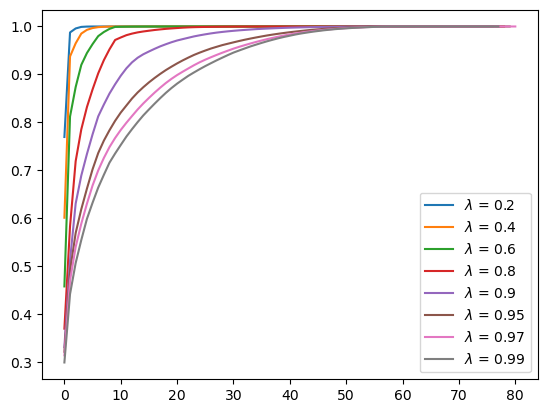

In [61]:
lambdas = [0.2,0.4,0.6,0.8,0.9,0.95,0.97,0.99]
for l in lambdas:
    cov_mat = cov_matrix(data, data.columns[1:], lambda_=l)
    explain_cum = PCA_explain(cov_mat)
    plt.plot(explain_cum, label = "$\lambda$ = "+str(l))
plt.legend()
plt.show()
plt.savefig('prob_1.png')